## Imports

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from PIL                     import Image
from graphs                  import barplots, countplots
from IPython.core.display    import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

## Table Of Contents

- [Reading In The Data](#Reading-In-The-Data)
    - [Simplified Data](#Simplified-Data)
    - [Raw Data](#Raw-Data)


- [Overview Of The Data](#Overview-Of-The-Data)
    - [Checking For Null Values](#Checking-For-Null-Values)
    - [Data Types](#Data-Types)
    - [Dataframe Info](#Dataframe-Info)
 
 
- [Data Visualizations](#Data-Visualizations)

    - [Words](#Words)
    - [Countries](#Countries)
    - [Was The Image Recognized?](#Was-The-Image-Recognized?)
    - [Date & Time Information](#Date-&-Time-Information)
        - [Year](#Year)
        - [Month](#Month)
        - [Day](#Day)
        - [Hour](#Hour)
        
        
- [Image-Processing](#Image-Processing)
     - [Sample Images](#Sample-Images)
     - [Creating A Dataframe From The Simplified Data](#Creating-A-Dataframe-From-The-Simplified-Data)
     - [Saving A New Dataframe](#Saving-A-New-Dataframe)

## Reading In The Data

Google offers various sets of their Quick, Draw! data.  The version we decided to work with was their simplified, formatted data which is a .npy file of 1D arrays which were extracted from the raw data.  However, those data files _only_ have the image whereas the raw data has other information about the drawings.

We were interested in the other data associated with each image so we decided get the raw data as well.

### Simplified Data

In [2]:
bear_raw = np.load("../Data/full_numpy_bitmap_bear.npy")
dog_raw  = np.load("../Data/full_numpy_bitmap_dog.npy")
cat_raw  = np.load("../Data/full_numpy_bitmap_cat.npy")

### Raw Data

In [3]:
bear_full = pd.read_json("../Data/full_raw_bear.ndjson", lines = True)
dog_full  = pd.read_json("../Data/full_raw_dog.ndjson", lines = True)
cat_full  = pd.read_json("../Data/full_raw_cat.ndjson", lines = True)

To make working with the raw data easier, we decided to concatenate all three of the files together.

In [4]:
bcd = pd.concat(objs = [bear_full, cat_full, dog_full],
                axis = 0)

In [5]:
# Making sure the conatenation produced what we expected

bcd.shape

(410123, 6)

## Overview Of The Data

### Checking For Null Values

In [6]:
bcd.isnull().sum()

word           0
countrycode    0
timestamp      0
recognized     0
key_id         0
drawing        0
dtype: int64

### Data Types

In [7]:
bcd.dtypes

word                        object
countrycode                 object
timestamp      datetime64[ns, UTC]
recognized                    bool
key_id                       int64
drawing                     object
dtype: object

### Dataframe Info

In [8]:
bcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410123 entries, 0 to 152158
Data columns (total 6 columns):
word           410123 non-null object
countrycode    410123 non-null object
timestamp      410123 non-null datetime64[ns, UTC]
recognized     410123 non-null bool
key_id         410123 non-null int64
drawing        410123 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 19.2+ MB


## Data Visualizations

### Words

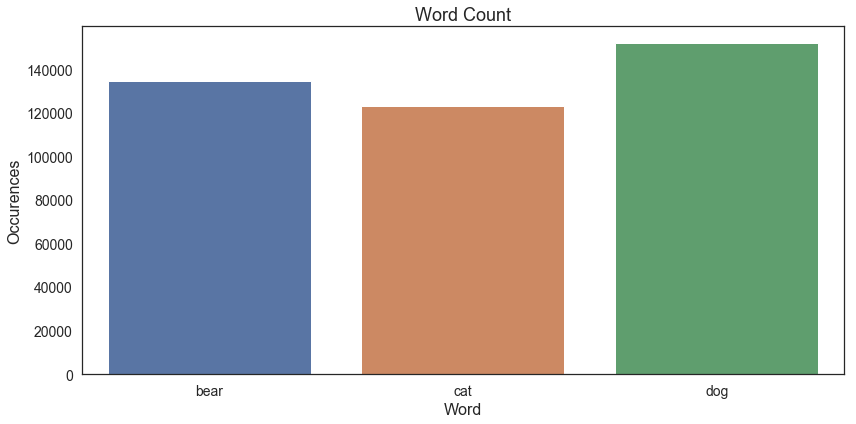

In [9]:
countplots(df      = bcd,
           columns = ["word"],
           titles  = ["Word Count"],
           labels  = ["Word"],
           ylabel  = "Occurences",
           dim     = (12,6),
           row     = 1,
           col     = 1)

We knew from the file classes, that we wouldn't have an equal split of classes but they are certainly not unbalanced.

### Country Code

In [10]:
# Creating a dataframe from the value counts for the top 10 countries

freq      = [175686, 28977, 14660, 13108, 9477, 9312, 7943, 7154, 6893, 6871]
countries = ["US", "GB", "CA", "DE", "RU", "AU", "BR", "FI", "CZ", "SE"]
a         = pd.DataFrame(data = [countries, freq]).T

# Renaming the headers 

a.rename(columns = {0: "Country", 1: "Frequency"}, inplace = True);

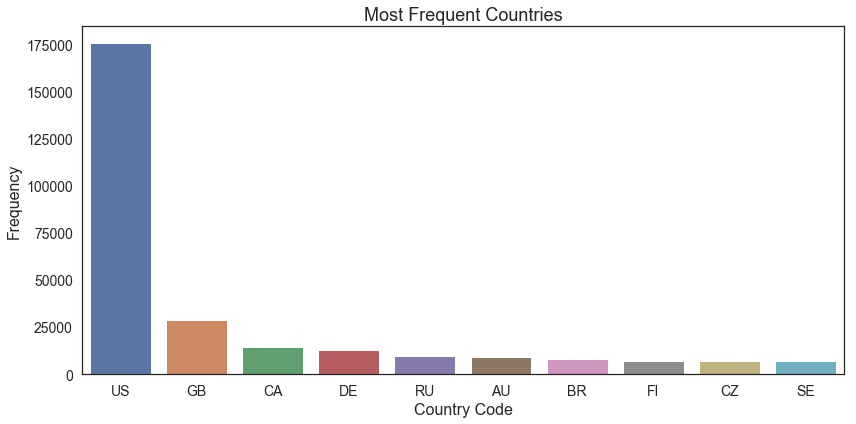

In [11]:
barplots(df      = a,
         columns = ["Country"],
         y       = "Frequency",
         labels  = ["Country Code"],
         ylabel  = "Frequency",
         titles  = ["Most Frequent Countries"],
         dim     = (12,6),
         row     = 1,
         col     = 1)

It's not suprising that the most drawings came from the United States but it is suprising how many more came from the US than the United Kingdom.

### Was The Image Recognized?

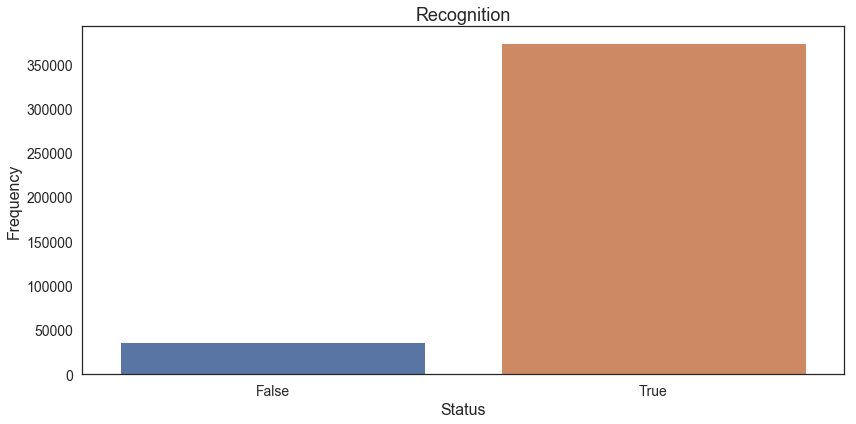

In [12]:
countplots(df      = bcd,
           columns = ["recognized"],
           titles  = ["Recognition"],
           labels  = ["Status"],
           ylabel  = "Frequency",
           dim     = (12,6),
           row     = 1,
           col     = 1)

Given how much variation there is in the drawings, we thought it was a little surprising that the vast majorty of the drawings were recognized by Google's algorithms.  That being said, Google is on the cutting edge of this kind of research.

### Date & Time Information

We saw above that the `timestamp` column is a datetime object which is good because we can extract information from it: in our case, we are interested in the day, month, year, & time.  To get that information, we will just create new columns.

In [13]:
# Extracting the year

bcd["year"]  = bcd["timestamp"].dt.year

# Extracting the month

bcd["month"] = bcd["timestamp"].dt.month

# Extracting the day

bcd["day"]   = bcd["timestamp"].dt.dayofweek

# Extracting the hour

bcd["time"]  = bcd["timestamp"].dt.hour

In [14]:
# Modifying the datetime data

# Changing month values to strings

bcd["month"] = bcd["month"].map({1: "January", 3: "March"})

# Changing day values to strings

bcd["day"]   = bcd["day"].map({0: "Mon.", 1: "Tue.", 2: "Wed.", 3: "Thu.",
                               4: "Fri.", 5: "Sat.", 6: "Sun."})

# Increasing the hour values to match a clock

bcd["time"]  = bcd["time"].apply(lambda x: x + 1) 

#### Year

As it turns out, all of our data came from 2017.

In [15]:
bcd["year"].value_counts()

2017    410123
Name: year, dtype: int64

We found that a little suprising because the game is still ongoing, but it is probably because they cycle through categories.

#### Month

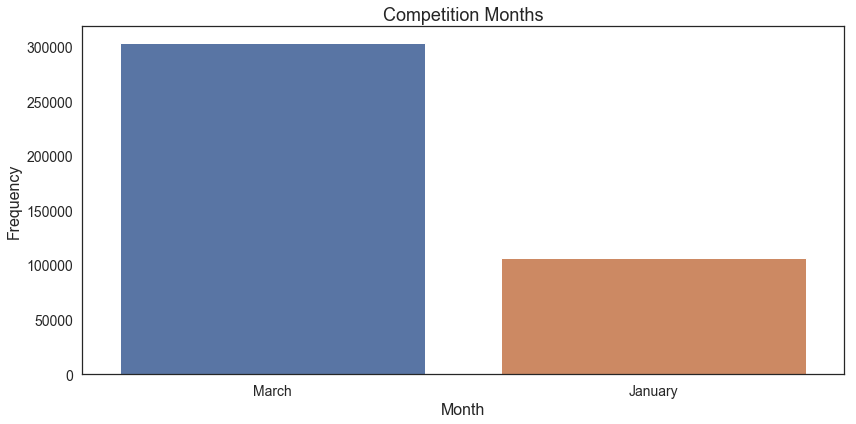

In [16]:
countplots(df      = bcd,
           columns = ["month"],
           titles  = ["Competition Months"],
           labels  = ["Month"],
           ylabel  = "Frequency",
           dim     = (12,6),
           row     = 1,
           col     = 1)

We also found it suprising that the drawings were produced in two separate months, but they probably do only a set of drawings at a time.

#### Day

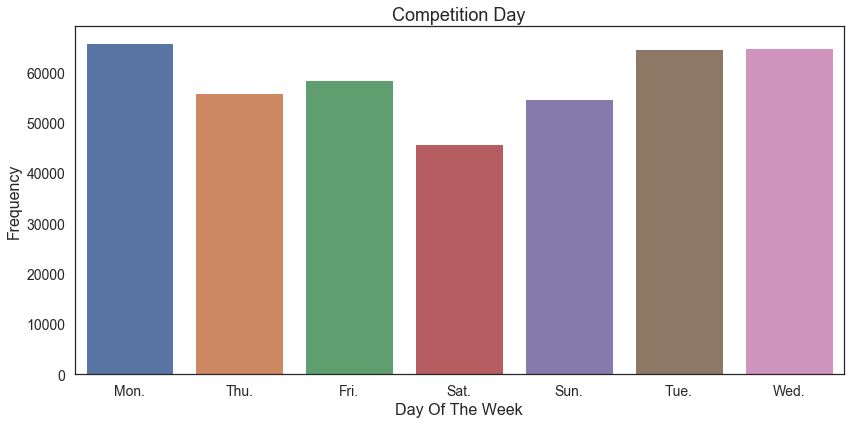

In [17]:
countplots(df      = bcd,
           columns = ["day"],
           titles  = ["Competition Day"],
           labels  = ["Day Of The Week"],
           ylabel  = "Frequency",
           dim     = (12,6),
           row     = 1,
           col     = 1)

It's not surprising that most of the drawings are done during the work week because people are on their computers most often during those five days.

#### Hour

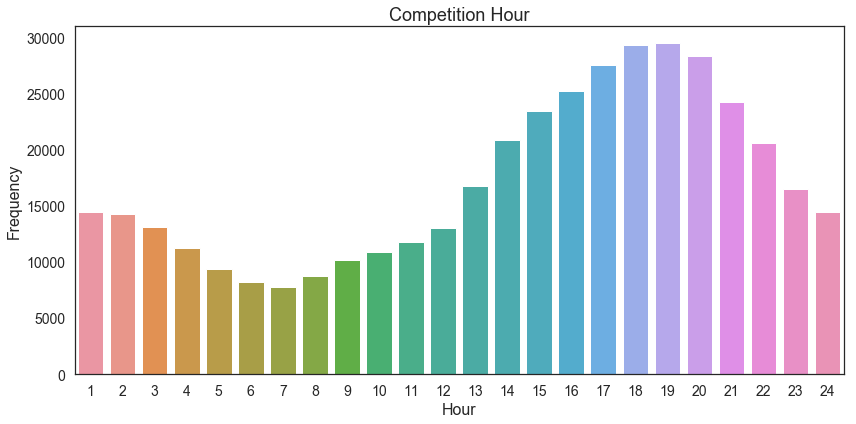

In [18]:
countplots(df      = bcd,
           columns = ["time"],
           titles  = ["Competition Hour"],
           labels  = ["Hour"],
           ylabel  = "Frequency",
           dim     = (12,6),
           row     = 1,
           col     = 1)

We have to take these times with a grain of salt because they are in UTC, but nonethless it is interesting that the number of drawings increase as it gets later in the day.

## Image Processing

### Sample Images

The data we will be modeling are 1D numpy arrays that have been resized to 28x28 pixels and centered by Google.

#### Bear

In [19]:
bear_sample = bear_raw[5]
bear_sample = bear_sample.reshape((28,28))
Image.fromarray(bear_sample)

#### Dog

In [20]:
dog_sample = dog_raw[5]
dog_sample = dog_sample.reshape((28,28))
Image.fromarray(dog_sample)

#### Cat

In [21]:
cat_sample = cat_raw[5]
cat_sample = cat_sample.reshape((28,28))
Image.fromarray(cat_sample)

### Creating A Dataframe From The Simplified Data

We want to pass in the 1D image arrays we have into the neural network as a dataframe. In for us to do that, we will have to concatentate each of the three dataframes together and then format each array as a row in the dataframe.

#### Creating Individual Dataframes

In [22]:
# One for bears

bears = pd.DataFrame(bear_raw)
bears.insert(0, "label", "bear")

# One for cats

cats = pd.DataFrame(cat_raw)
cats.insert(0, "label", "cat")

# One for dogs

dogs = pd.DataFrame(dog_raw)
dogs.insert(0, "label", "dog")

#### Concatenating Them Together

In [23]:
animals = pd.concat(objs = [bears, cats, dogs],
                    axis = 0)

### Saving A New Dataframe

In [24]:
animals.to_csv("../Data/animals.csv", index = False)

[Top](#Table-Of-Contents)